In [62]:
import math
import torch
import numpy as np
from numpy.random import choice, uniform
import scipy.stats as stats
import matplotlib.pyplot as plt

In [81]:
def generate_single_sample(cue_start_idx, cue_mag, cue_len, offset, noise_level, length=1000):
    # Generate base signal
    sample = np.zeros((length,))
    # Generate cue
    mu = 0
    variance = 1
    sigma = math.sqrt(variance)
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, cue_len)
    c = stats.norm.pdf(x, mu, sigma)
    c = cue_mag*(c/np.max(c))
    # Add cue onto the base signal
    sample[cue_start_idx:cue_start_idx+cue_len] = c
    # Add offset and noise
    return sample + offset + np.random.normal(scale=noise_level, size=(sample.shape))

def generate_samples(num, source_cue_mean_idx, target_cue_mean_idx):
    # Generate sources
    sources = []
    for _ in range(num):
        cue_start_idx = choice(np.arange(source_cue_mean_idx-10, source_cue_mean_idx+10))
        cue_mag = uniform(0.4, 0.6)
        cue_len = choice(np.arange(250, 350))
        offset = uniform(0.98, 1.02)
        sources.append(generate_single_sample(cue_start_idx, cue_mag, cue_len, offset, 0.01))
    sources = np.array(sources).T
    # Generate targets
    targets = []
    for _ in range(num):
        cue_start_idx = choice(np.arange(target_cue_mean_idx-10, target_cue_mean_idx+10))
        cue_mag = uniform(0.4, 0.6)
        cue_len = choice(np.arange(250, 350))
        offset = uniform(0.98, 1.02)
        targets.append(generate_single_sample(cue_start_idx, cue_mag, cue_len, offset, 0.01))
    targets = np.array(targets).T

    return sources, targets

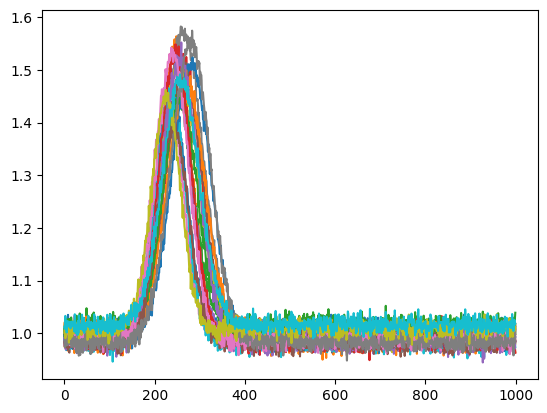

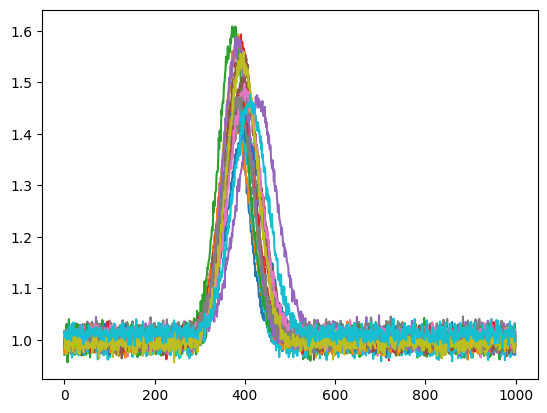

In [82]:
sources, targets = generate_samples(20, source_cue_mean_idx=100, target_cue_mean_idx=250)

plt.figure()
plt.plot(sources)
plt.figure()
plt.plot(targets)
plt.show()